In [98]:
import math
import matplotlib.pyplot as plt
pi = math.pi

## Problem 3  (35 points)
#### You are designing a spherical tank to hold water for a small village in a remote location.  The volume of liquid it can hold can be computed as 
$$V=\pi h^{2}\frac{[3R-h]}{3}$$

#### where $V$ = volume ($m^3$), $h$ = depth of water in the tank (m), and $R$ = the tank radius (m).  See below or the hardcopy problem statement for a schematic that highlights the system geometry.

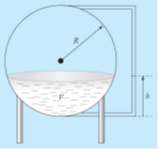

#### (a)  If $R = 3$ $m$, to what depth must the tank be filled so that it holds $30$ $m^3$?  Use the Newton-Raphson method for this problem.


trying to solve:
$$f(h) = 0$$
where
$$f(h) = \pi h^{2}\frac{[3R-h]}{3} - 30$$
simplify:
$$f(h) = 3\pi h^{2}\ - \frac{1}{3}\pi h^{3}-30$$



In [99]:
def f(h):
    return 3*pi*h**2 - pi*h**3/3 - 30
def fprime(h):
    return 6*pi*h - pi*h**2
def nr(h0):
    h2 = h0
    iter = 0
    tol = 0.00000001
    error = 1
    while iter < 1000 and error > tol:
        iter += 1
        h1 = h2
        h2 = h1 - f(h1)/fprime(h1)
        error = f(h2)
    if error < tol:
        return h2
    else:
        return "not found"

In [100]:
guess = 3
true_root = nr(guess)
print(f'h = {round(true_root, 3)}')

h = 2.027


#### (b)   Create a semilog plot of true percent relative error as a function of iteration number.

(1e-06, 100)

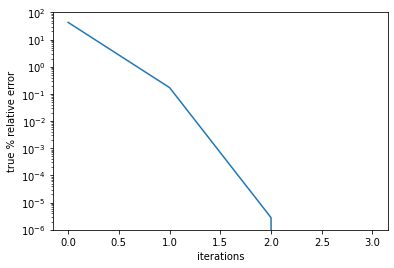

In [101]:
def nr_plot(h0):
    h2 = h0
    iter = 0
    tol = 0.00000001
    error = 1
    errors = []
    while iter < 1000 and error > tol:
        iter += 1
        h1 = h2
        h2 = h1 - f(h1)/fprime(h1)
        error = f(h2)
        errors.append(error/true_root * 100)

    return errors, iter

tpre, n = nr_plot(guess)
iters = [i for i in range(n)]

plt.plot(iters, tpre)
plt.ylabel('true % relative error')
plt.xlabel('iterations')
plt.yscale("log")
plt.ylim([0.000001, 100])

#### (c)  If the tank is being filled at a constant volumetric rate (e.g., $0.1$ $m^3/min$⁡), explain what you would expect a plot of the *volume* of water in the tank versus time would look like.  <ins>Explain only</ins>;  no calculations or programming needed.    

Constant volumetric rate means that dV/dt = constant, so the curve will have constant slope. It is a straight line until the tank is full.

#### (d)  If the tank is being filled at a constant volumetric rate (e.g., $0.1$ $m^3/min$⁡), explain what you would expect a plot of the *depth* of water in the tank versus time would look like.  <ins>Explain only</ins>;  no calculations or programming needed.    

At a constant volumetric rate, the curve starts off steep at the bottom of the tank since the bottom of the tank is narrower. It gradually flattens until h = R, at which point it starts getting steeper again until the tank is full.

#### (e)	Starting with an empty tank (i.e., $h = 0$ $m$ at $t = 0$ $min$), you begin to fill it at a constant volumetric rate.  You measure the height of the water level in the tank to be $h = 2.54$ $m$ and $3.43$ $m$ at times of $t = 175$ $min$ and $275$ $min$, respectively.  What is the volumetric rate at which you are filling the tank?

In [102]:
h1 = 2.54
h2 = 3.43
t1 = 175
t2 = 275

def V(h):
    return f(h) + 30
V1 = V(h1)
V2 = V(h2)
rate = (V2 - V1) / (t2 - t1)
print(f'volumetric rate is {round(rate, 4)} m^3 per min')

volumetric rate is 0.2498 m^3 per min
